#Cluster Analysis Challenge

The Department of Education is focused on ensuring that parents, students, and policymakers are able to use its publicly available data to take meaningful action to improve outcomes.

1. Supporting Decision-Making for Student Sub-populations and their Families.
2. Identifying Equity Scores and Gaps

Task:

Use cluster analysis to identify the groups of characteristically similar schools in the College Scorecard dataset.

Dataset Source: https://data.world/exercises/cluster-analysis-exercise-2

In [147]:
# Importing Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import time
import warnings
warnings.filterwarnings('ignore')

In [148]:
# Importing Data

df_college=pd.read_csv('drive/MyDrive/CollegeScorecard.csv')

In [3]:
df_college.head()

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,sch_deg,HCM2,main,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,st_fips,region,LOCALE,locale2,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,...,mn_earn_wne_indep1_p6,mn_earn_wne_male0_p6,mn_earn_wne_male1_p6,count_nwne_p7,count_wne_p7,mn_earn_wne_p7,sd_earn_wne_p7,gt_25k_p7,count_nwne_p8,count_wne_p8,mn_earn_wne_p8,md_earn_wne_p8,pct10_earn_wne_p8,pct25_earn_wne_p8,pct75_earn_wne_p8,pct90_earn_wne_p8,sd_earn_wne_p8,gt_25k_p8,count_nwne_p9,count_wne_p9,mn_earn_wne_p9,sd_earn_wne_p9,gt_25k_p9,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,LO_INC_RPY_3YR_RT_SUPP,MD_INC_RPY_3YR_RT_SUPP,HI_INC_RPY_3YR_RT_SUPP,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,NaN,0,1,1,3,4,1,1,5,12.0,NaN,34.7834,-86.5685,18.0,9.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.8989,0.8989,370.0,450.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19500,33611.5,373.1565536,0.44471387,0.448163265,0.446488294,0.422018349,0.578873239,0.373790022,0.442857143,0.45890411,0.443586698,0.452513966,0.484818805,0.406,0.423580786,0.44245283
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,NaN,0,1,1,3,4,1,1,5,12.0,NaN,33.5022,-86.8092,15.0,8.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.8673,0.8673,520.0,640.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16250,23117,256.6460899,0.756266667,0.724256293,0.770134228,0.818059299,0.847800926,0.678748759,0.767798013,0.739164697,0.732297853,0.795454545,0.760521886,0.755344418,0.751552795,0.765074771
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,NaN,0,1,1,3,4,2,1,5,12.0,NaN,32.3626,-86.1740,21.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10500,PrivacySuppressed,PrivacySuppressed,0.647249191,0.597701149,0.709090909,PrivacySuppressed,0.807692308,0.61328125,PrivacySuppressed,0.641114983,0.600877193,0.775,0.610465116,0.686567164,0.632653061,0.65
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,NaN,0,1,1,3,4,1,1,5,12.0,NaN,34.7228,-86.6384,15.0,8.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.8062,0.8062,510.0,640.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16500,24738,274.6425129,0.781997919,0.721404304,0.824742268,0.851936219,0.892045455,0.689788054,0.800347222,0.75564409,0.738341969,0.851405622,0.768378651,0.79844098,0.778156997,0.791666667
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,NaN,0,1,1,3,4,1,1,5,12.0,NaN,32.3643,-86.2957,18.0,9.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5125,0.5125,380.0,480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15854.5,33452,371.3857766,0.331198862,0.310875332,0.376106195,0.333333333,0.482490272,0.315996848,0.32410212,0.350993377,0.320016821,0.380829016,0.364423718,0.286530612,0.315737052,0.

In [4]:
df_college.shape

(7804, 1725)

In [149]:
# Drop duplicate row
df= df_college.drop_duplicates()


# 'PrivacySuppressed' is actually a missed value so replacing them with NAN
df= df.replace(to_replace="PrivacySuppressed", value=np.nan)


In [150]:
# Drop column with more than 30% missing values

limitPer = len(df) * 0.7
df = df.dropna(thresh=limitPer, axis=1 )
df.shape

(7804, 351)

Categorical variables represent groupings of some kind. They are sometimes recorded as numbers, but the numbers represent categories rather than actual amounts of things.

There are three types of categorical variables: binary, nominal, and ordinal variables.
Here I am trying to drop all categorical variables.

In [151]:
# droping binary variables
binary=df.nunique()[df.nunique()<3]
df.drop(columns=binary.index,inplace=True)

In [152]:
# droping variables that have three unique values

cat=df.nunique()[df.nunique()<=3]
df.drop(columns=cat.index,inplace=True)
df.shape

(7804, 145)

In [11]:
# Find out variable with several unique variable and they could be categorical

df.nunique()[df.nunique()<20]

PREDDEG     5
HIGHDEG     5
region     10
LOCALE     12
PCIP29     12
dtype: int64

In [12]:
df.PREDDEG.value_counts()

1    3326
3    2133
2    1534
0     519
4     292
Name: PREDDEG, dtype: int64

In [13]:
df.HIGHDEG.value_counts()

1    2594
4    2056
2    1739
3     896
0     519
Name: HIGHDEG, dtype: int64

In [14]:
df.region.value_counts()

5    1910
2    1190
3    1170
8    1116
6     822
4     684
1     446
7     303
9     162
0       1
Name: region, dtype: int64

In [15]:
df.LOCALE.value_counts()

21.0    1948
11.0    1716
13.0     972
12.0     897
32.0     412
33.0     392
41.0     387
22.0     215
23.0     135
31.0     123
42.0     121
43.0      62
Name: LOCALE, dtype: int64

In [16]:
df.PCIP29.value_counts()

0.0000    7075
0.2418       1
0.0046       1
0.0342       1
0.0039       1
0.0063       1
0.0011       1
0.0740       1
0.0204       1
0.0006       1
0.0090       1
0.0018       1
Name: PCIP29, dtype: int64

Looking at information above we can conclude that PREDDEG, HIGHDEG are categorical. LOCALE, region and PCIP29 are not categorical.

In [153]:
df.drop(columns=['PREDDEG','HIGHDEG'],inplace=True)

In [154]:
# Droping qualitative variables

df.drop(columns=['UNITID', 'OPEID', 'opeid6', 'INSTNM', 'CITY','STABBR', 'ZIP', 'AccredAgency', 'INSTURL', 'NPCURL','st_fips','LATITUDE', 'LONGITUDE'],inplace=True)

In [19]:
df.shape

(7804, 130)

In [20]:
df.isna().sum().sort_values(ascending=False).head(10)

NOPELL_RPY_3YR_RT_SUPP    2322
MD_INC_RPY_3YR_RT_SUPP    2291
LO_INC_RPY_7YR_N          2291
PELL_DEBT_MDN             2220
LO_INC_RPY_5YR_N          2189
PELL_RPY_3YR_N            2167
DEP_RPY_3YR_RT_SUPP       2165
NONCOM_RPY_3YR_RT_SUPP    2150
MD_INC_RPY_3YR_N          2138
FIRSTGEN_RPY_7YR_N        2118
dtype: int64

In [155]:
# Finding all variables with missing values

nan_col=[i for i in df.columns if df[i].isnull().any()]
len(nan_col)

128

In [156]:
# Filling missed values using Median

for c in nan_col:
  df.loc[:,c]=df.loc[:,c].fillna(df.loc[:,c].median())

In [23]:
df.isna().sum() # No more missed value

NUMBRANCH                      0
region                         0
LOCALE                         0
PCIP01                         0
PCIP03                         0
                              ..
PELL_RPY_3YR_RT_SUPP           0
NOPELL_RPY_3YR_RT_SUPP         0
FEMALE_RPY_3YR_RT_SUPP         0
FIRSTGEN_RPY_3YR_RT_SUPP       0
NOTFIRSTGEN_RPY_3YR_RT_SUPP    0
Length: 130, dtype: int64

In [24]:
df.shape

(7804, 130)

##PCA dimentionality reduction

In [157]:
X= df

In [158]:
# Standardizing the features

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [159]:
# Reducing the dimentionality by applying PCA

pca=PCA(n_components=130)
X_pca=pca.fit_transform(X_std)

In [29]:
print(pca.components_)

[[ 9.85158534e-02  9.92668934e-03 -1.89032921e-02 ... -6.77034622e-02
  -6.61669089e-02 -6.54845645e-02]
 [-6.26899022e-03 -3.56616576e-02  5.39246092e-03 ...  1.55527554e-01
   1.52899140e-01  1.56204780e-01]
 [ 8.78376558e-02  8.19064430e-04 -5.95787006e-02 ... -1.37390244e-01
  -1.38965205e-01 -1.37093099e-01]
 ...
 [ 2.54344340e-11 -2.31961126e-12  5.09714608e-14 ... -1.05125984e-11
   3.03753130e-12  1.10004362e-11]
 [-1.74078428e-13  3.61444508e-13  2.03241820e-14 ...  1.42966055e-12
   6.57888942e-13  1.31805955e-12]
 [ 0.00000000e+00  6.89741740e-19 -3.35374583e-17 ... -1.62728920e-16
  -3.18542864e-16  3.49256269e-16]]


In [30]:
var_explained= pca.explained_variance_ratio_
print(np.round(var_explained,2))
print (sum(pca.explained_variance_ratio_))

[0.23 0.2  0.06 0.03 0.02 0.02 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.  ]
0.9999999999999999


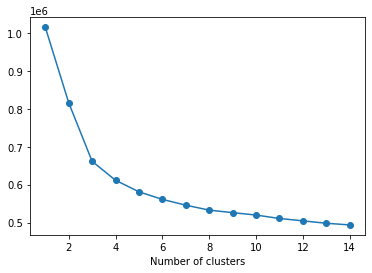

In [31]:
# Applying Elbow method to find number of optimal clusters

w=[]
for i in range(1,15):
  km=KMeans(n_clusters=i,init='random',n_init=10,max_iter=300)
  km.fit(X_pca)
  w.append(km.inertia_)
plt.plot(range(1,15),w, marker='o')
plt.xlabel('Number of clusters')
plt.show()

Number of optimal clusters are 2 or 3

###Clustering with K-Mean

For n_clusters = 2 The average silhouette_score is : 0.756032967027354
For n_clusters = 3 The average silhouette_score is : 0.2758998587127261
For n_clusters = 4 The average silhouette_score is : 0.21421794045700454
For n_clusters = 5 The average silhouette_score is : 0.11991105447582506
For n_clusters = 6 The average silhouette_score is : 0.11067743293787913


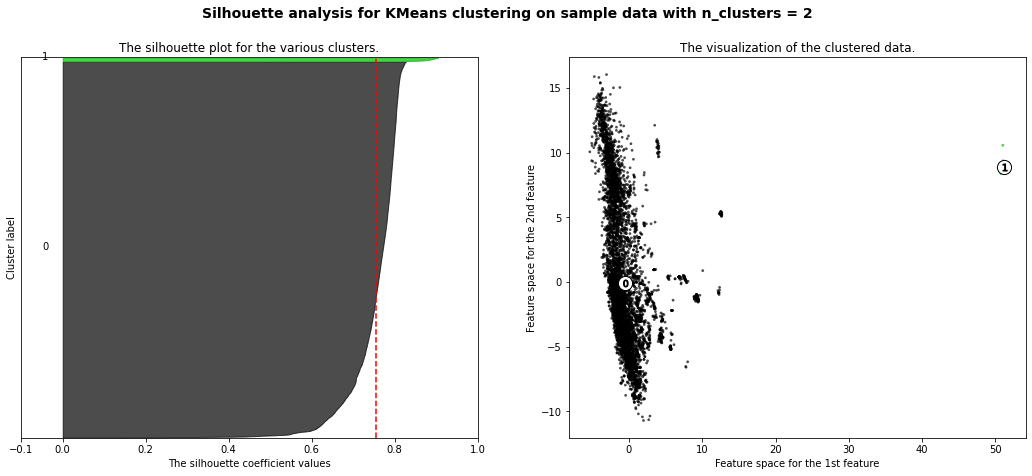

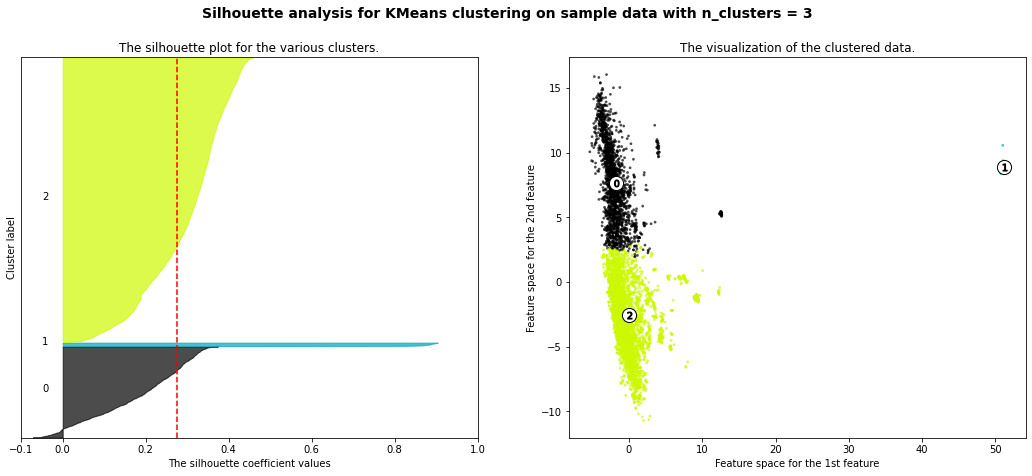

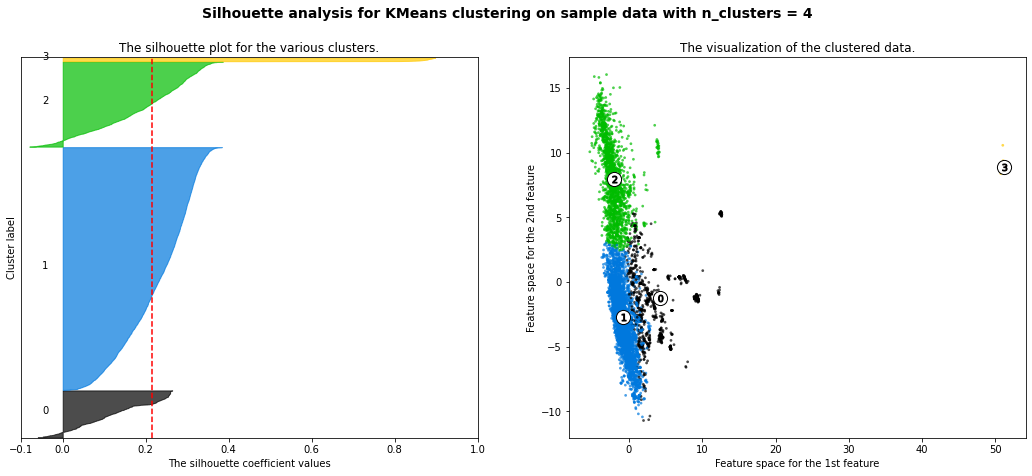

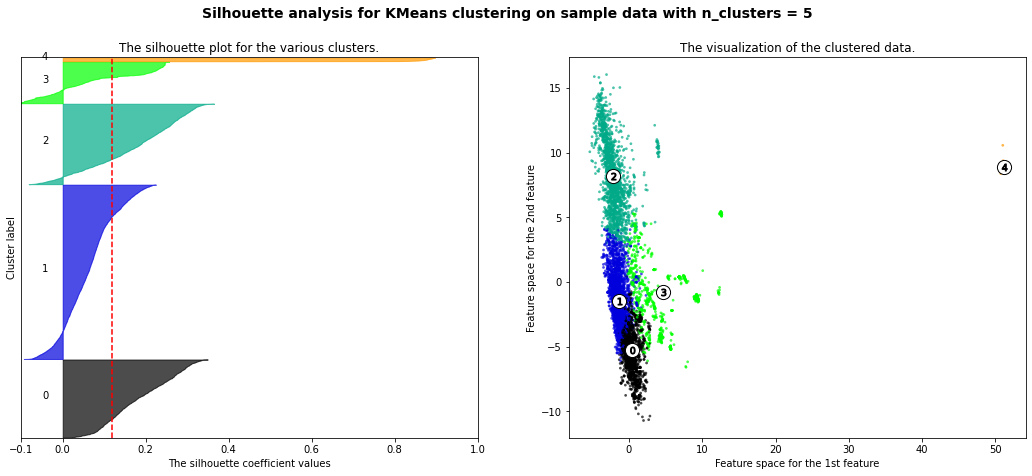

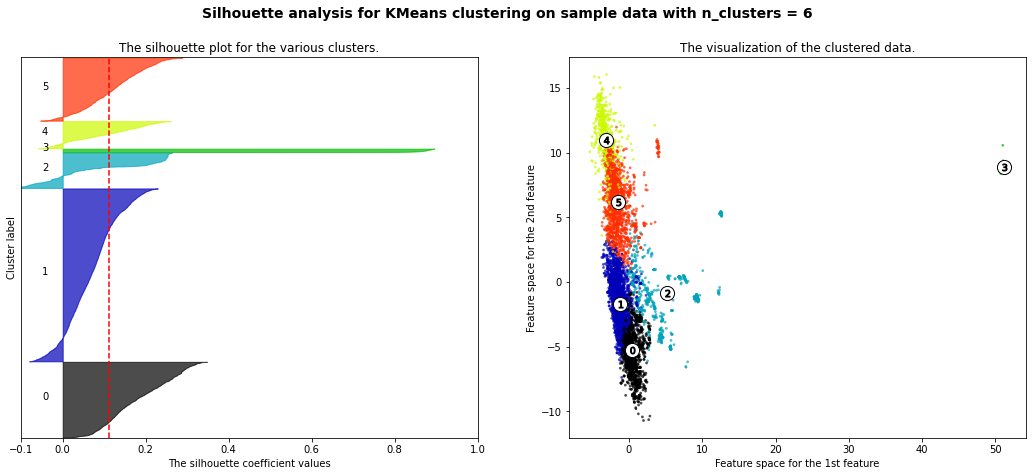

In [84]:
X=X_pca

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    clusterer = KMeans(n_clusters=n_clusters, random_state=123)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [121]:
X=X_pca
time_start=time.time()
clusterer = KMeans(n_clusters=2, random_state=123)
cluster_kmean = clusterer.fit_predict(X)
print('Time:{:.2f}'.format(time.time()-time_start))
print('For n_clusters = 2 The average silhouette_score is :')
print(metrics.silhouette_score(X, cluster_kmean, metric='euclidean'))

Time:0.86
For n_clusters = 2 The average silhouette_score is :
0.756032967027354


In this example the silhouette analysis is used to choose an optimal value for n_clusters. The silhouette score is higher for n_cluster value of 2.


###Clustering with GMM



In [120]:
from sklearn.mixture import GaussianMixture
time_start=time.time()
gmm=GaussianMixture(n_components=2,random_state=123)
clusters_gmm=gmm.fit_predict(X_pca)
print('Time:{:.2f}'.format(time.time()-time_start))
print('For n_clusters = 2 The average silhouette_score is :')
print(metrics.silhouette_score(X_pca, clusters_gmm, metric='euclidean'))

Time:4.28
For n_clusters = 2 The average silhouette_score is :
0.06788466233781924


In [126]:
from sklearn.mixture import GaussianMixture
time_start=time.time()
gmm=GaussianMixture(n_components=5,random_state=123)
clusters_gmm=gmm.fit_predict(X)
print('Time:{:.2f}'.format(time.time()-time_start))
print('For n_clusters = 5 The average silhouette_score is :')
print(metrics.silhouette_score(X, clusters_gmm, metric='euclidean'))

Time:9.73
For n_clusters = 5 The average silhouette_score is :
0.09370879059983449


###Clustering with DBSCAN

In [64]:
from sklearn.cluster import DBSCAN
time_start=time.time()
dbscan=DBSCAN(eps=1,min_samples=7)
cluster_dbscan=dbscan.fit_predict(X)
print('Time:{:.2f}'.format(time.time()-time_start))
print('The average silhouette_score is :')
print(metrics.silhouette_score(X, cluster_dbscan, metric='euclidean'))

Time:0.13
The average silhouette_score is :
-0.21720587


###Clustering with Hierarchical clustering

In [127]:
from sklearn.cluster import AgglomerativeClustering
time_start=time.time()
agg=AgglomerativeClustering(linkage='complete',affinity='cosine',n_clusters=2)
cluster_agg=agg.fit_predict(X)
print('Time:{:.2f}'.format(time.time()-time_start))
print('For n_clusters = 2 The average silhouette_score is :')
print(metrics.silhouette_score(X, cluster_agg, metric='euclidean'))

Time:4.33
For n_clusters = 2 The average silhouette_score is :
0.210475806738753


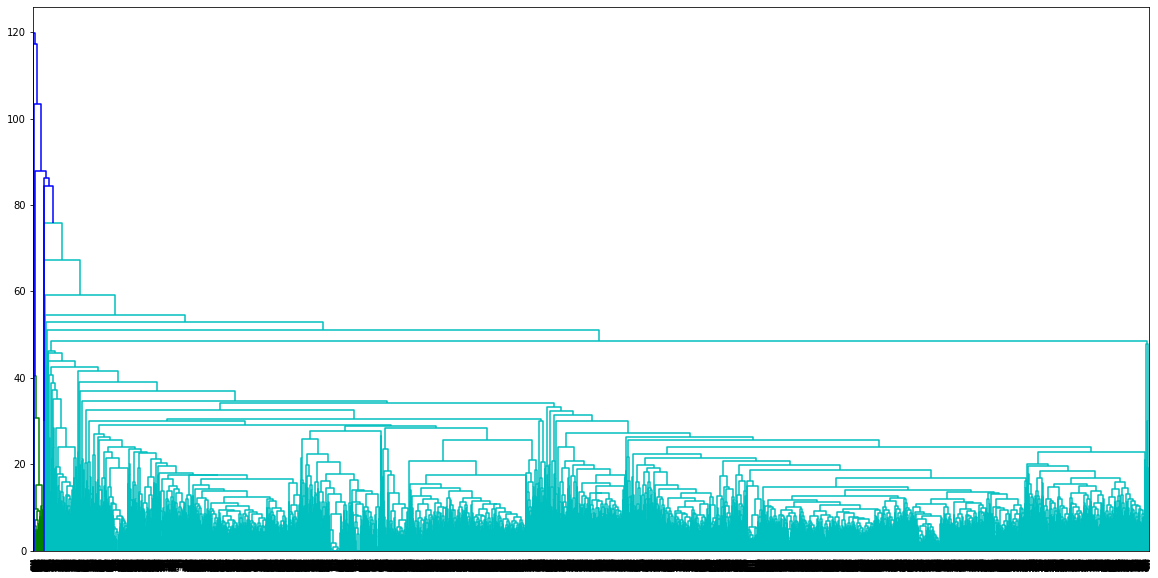

In [46]:
# drawing Dandrogram
from scipy.cluster.hierarchy import dendrogram,linkage
plt.figure(figsize=(20,10))
dendrogram(linkage(X,method='complete'))
plt.show()

Based on hierarchical structure of dandrogram optimal number of clusters are 2. 

##umap dimentionality reduction

For using umap we need to install it first.

In [47]:
!pip install umap_learn

     |████████████████████████████████| 86 kB 3.0 MB/s 
     |████████████████████████████████| 1.1 MB 11.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=ee60fef47ec403d6de639bd036e56c7df8191be7bb7a112ebfa47b9e1b246e4a
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=fc8ca08915670b4a793ac6daa0db51c0d6839e9df7b3ecd99f2da12d224487e7
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [48]:
import umap

In [165]:
# Standardizing the features
X=df
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [166]:
umap_result=umap.UMAP(n_neighbors=10,min_dist=0.3,metric='cosine').fit_transform(X_std)

In [51]:
umap_result

array([[ 6.635257 ,  2.5173228],
       [14.576999 ,  4.5320163],
       [ 9.079414 ,  4.254726 ],
       ...,
       [19.584696 , -6.24523  ],
       [19.61392  , -6.274448 ],
       [19.581863 , -6.242387 ]], dtype=float32)

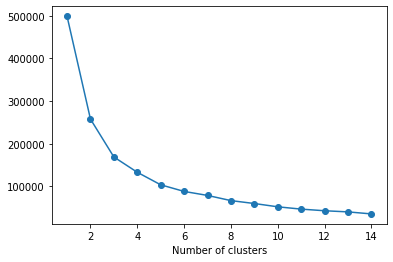

In [52]:
# Applying Elbow method to find number of optimal clusters

w=[]
for i in range(1,15):
  km=KMeans(n_clusters=i,init='random',n_init=10,max_iter=300)
  km.fit(umap_result)
  w.append(km.inertia_)
plt.plot(range(1,15),w, marker='o')
plt.xlabel('Number of clusters')
plt.show()

###Clustering with K-Mean

For n_clusters = 2 The average silhouette_score is : 0.42878073
For n_clusters = 3 The average silhouette_score is : 0.42595214
For n_clusters = 4 The average silhouette_score is : 0.4240799
For n_clusters = 5 The average silhouette_score is : 0.42036504
For n_clusters = 6 The average silhouette_score is : 0.44114977


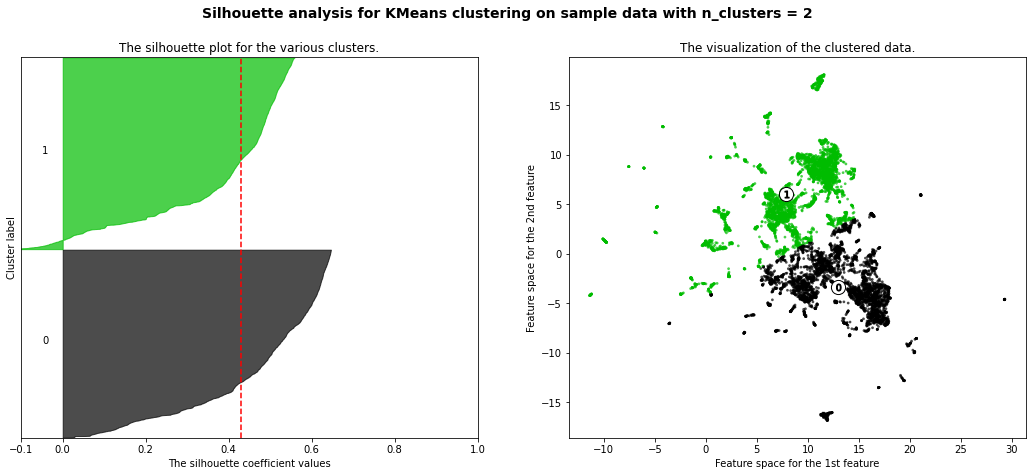

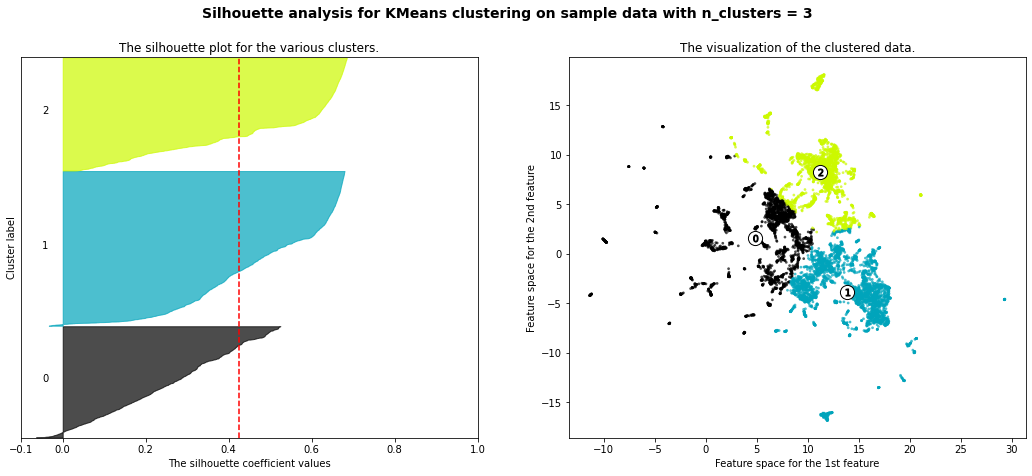

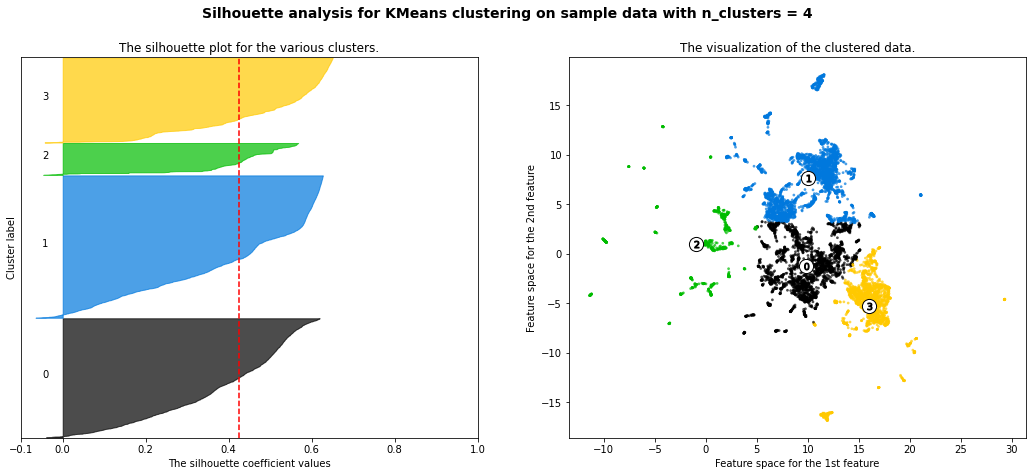

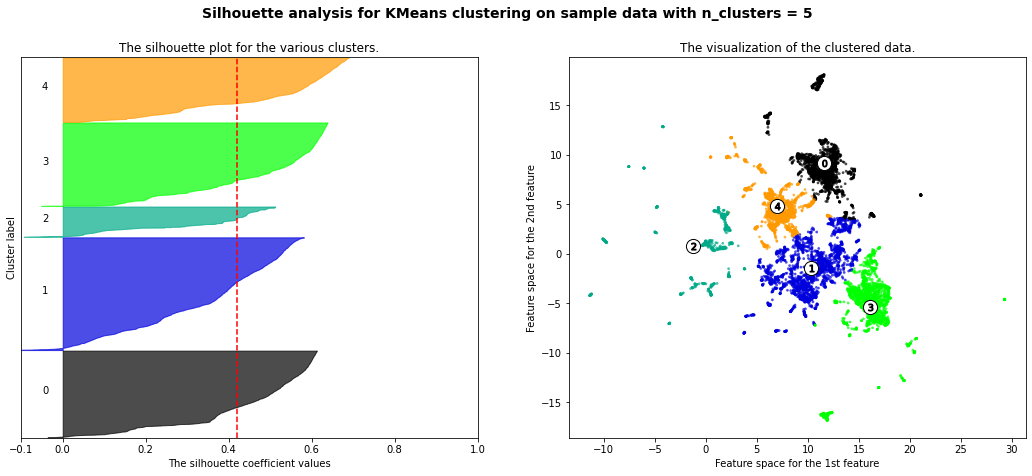

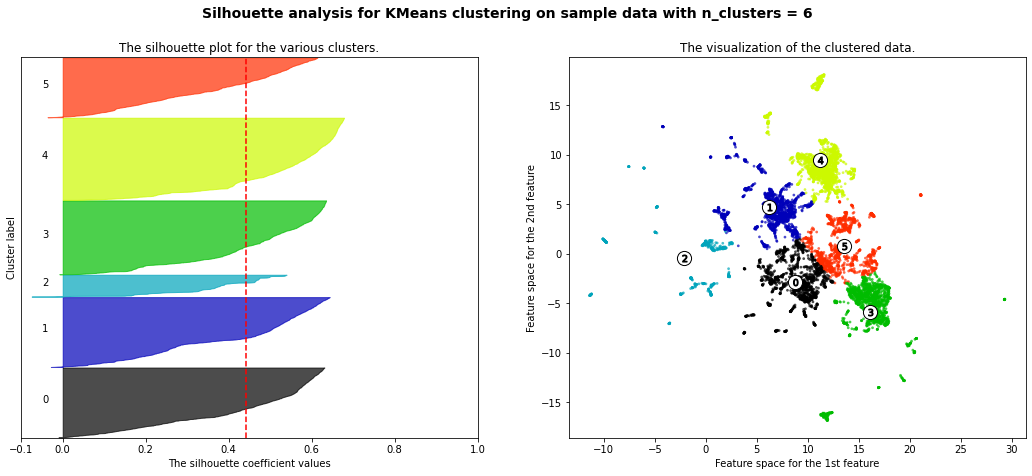

In [83]:
X=umap_result

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=123)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

The silhouette plots are much better using Umap. The silhouette plot shows that the n_clusters value of 3,4,5 and 6 are a bad pick for the given data due to wide fluctuations in the size of the silhouette plots.
Also from the thickness of the silhouette plot the cluster size can be visualized. When the n_clusters is equal to 2, all the plots are more or less of similar thickness and hence are of similar sizes as can be also verified from the labelled scatter plot on the right.

In [167]:
X=umap_result
time_start=time.time()
clusterer = KMeans(n_clusters=2, random_state=123)
cluster_kmean = clusterer.fit_predict(X)
print('Time:{:.2f}'.format(time.time()-time_start))
print('For n_clusters = 2 The average silhouette_score is :')
print(metrics.silhouette_score(X, cluster_kmean, metric='euclidean'))

Time:0.07
For n_clusters = 2 The average silhouette_score is :
0.47575378


In [131]:
time_start=time.time()
clusterer = KMeans(n_clusters=6, random_state=123)
cluster_kmean = clusterer.fit_predict(X)
print('Time:{:.2f}'.format(time.time()-time_start))
print('For n_clusters = 6 The average silhouette_score is :')
print(metrics.silhouette_score(X, cluster_kmean, metric='euclidean'))

Time:0.19
For n_clusters = 6 The average silhouette_score is :
0.4460998


###Clustering with GMM

In [136]:
from sklearn.mixture import GaussianMixture
time_start=time.time()
gmm=GaussianMixture(n_components=2,random_state=123)
clusters_gmm=gmm.fit_predict(X)
print('Time:{:.2f}'.format(time.time()-time_start))
print('For n_clusters = 2 The average silhouette_score is :')
print(metrics.silhouette_score(X, clusters_gmm, metric='euclidean'))


Time:0.08
For n_clusters = 2 The average silhouette_score is :
0.31088373


In [140]:
from sklearn.mixture import GaussianMixture
time_start=time.time()
gmm=GaussianMixture(n_components=6,random_state=123)
clusters_gmm=gmm.fit_predict(X)
print('Time:{:.2f}'.format(time.time()-time_start))
print('For n_clusters = 2 The average silhouette_score is :')
print(metrics.silhouette_score(X, clusters_gmm, metric='euclidean'))

Time:0.10
For n_clusters = 2 The average silhouette_score is :
0.39520854


###Clustering with DBSCAN

In [133]:
from sklearn.cluster import DBSCAN
time_start=time.time()
dbscan=DBSCAN(eps=1,min_samples=7)
cluster_dbscan=dbscan.fit_predict(X)
print('Time:{:.2f}'.format(time.time()-time_start))
print('The average silhouette_score is :')
print(metrics.silhouette_score(X, cluster_dbscan, metric='euclidean'))

Time:0.13
The average silhouette_score is :
-0.26677543


###Clustering with Hierarchical clustering

In [146]:
from sklearn.cluster import AgglomerativeClustering
time_start=time.time()
agg=AgglomerativeClustering(linkage='complete',affinity='cosine',n_clusters=2)
cluster_agg=agg.fit_predict(X)
print('Time:{:.2f}'.format(time.time()-time_start))
print('For n_clusters = 2 The average silhouette_score is :')
print(metrics.silhouette_score(X, cluster_agg, metric='euclidean'))

Time:1.32
For n_clusters = 2 The average silhouette_score is :
0.4972343


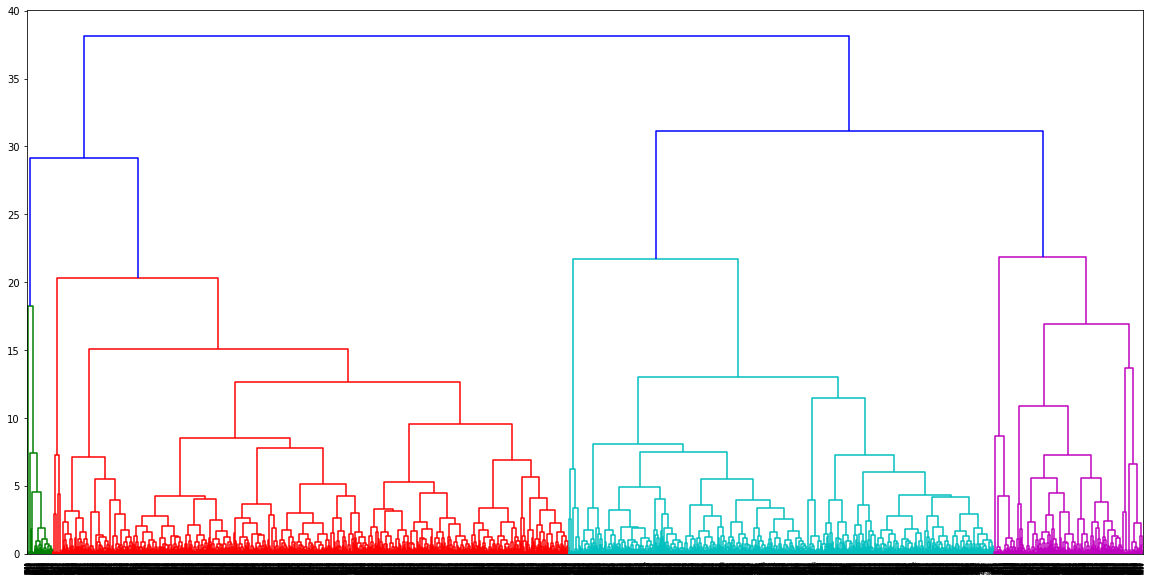

In [141]:
# drawing Dandrogram
from scipy.cluster.hierarchy import dendrogram,linkage
plt.figure(figsize=(20,10))
dendrogram(linkage(umap_result,method='complete'))
plt.show()

Based on hierarchical structure of dandrogram optimal number of clusters are 2.

In this project 4 different clustering algorithms are comparing. Once Principal Component Analysis applied for dimentionality reduction, and the second time umap is applied.




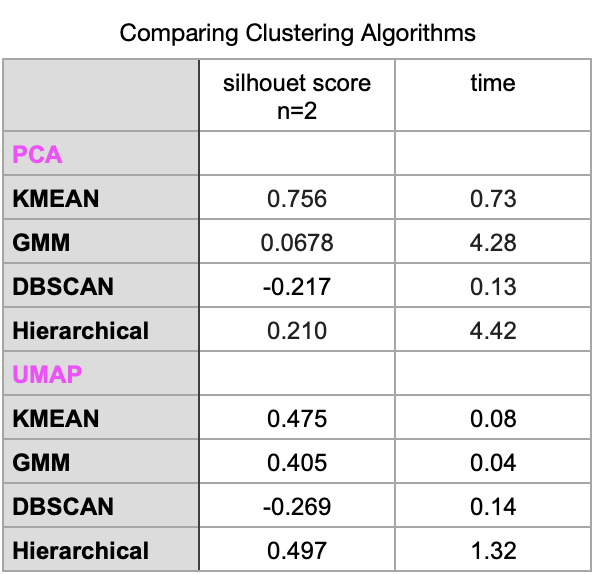 

K-mean has the highest silhouet score specially with PCA dimentionality reduction method. DBSCAN very fast.
umap is slower than PCA but after applying umap, clustering algorithmes are running faster!
